In [23]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 

In [24]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [25]:
data = pd.read_csv("/content/drive/MyDrive/dataset/column_2C_weka.csv")

In [26]:
data.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


In [36]:
x=data.loc[:,data.columns != 'class']
y=data.loc[:,'class']

In [37]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.20)

In [38]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)
x_train= scaler.transform(x_train)
x_test= scaler.transform(x_test)

In [39]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(x, y)


KNeighborsClassifier()

In [43]:
y_pred = classifier.predict(x)

In [46]:
print("k:{}, score:{}".format(3,classifier.score(x_test,y_test)))

k:3, score:0.6451612903225806


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


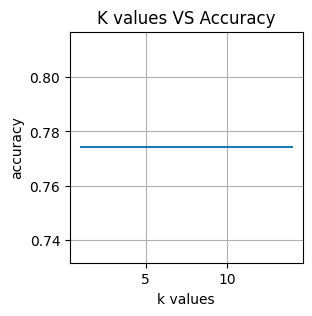

best accuracy is 0.7741935483870968 with k = 1


In [55]:
test_accuracy =[]
for each in range(1,15):
  classifier = KNeighborsClassifier(n_neighbors = each)
  classifier.fit(x_train, y_train)
  test_accuracy.append(knn2.score(x_test,y_test))

plt.figure(figsize=(3,3))
plt.plot(range(1,15),test_accuracy)
plt.title('K values VS Accuracy')
plt.xlabel("k values")
plt.ylabel("accuracy")
plt.grid()
plt.show()
print("best accuracy is {} with k = {}".format(np.max(test_accuracy),1+test_accuracy.index(np.max(test_accuracy)))) 


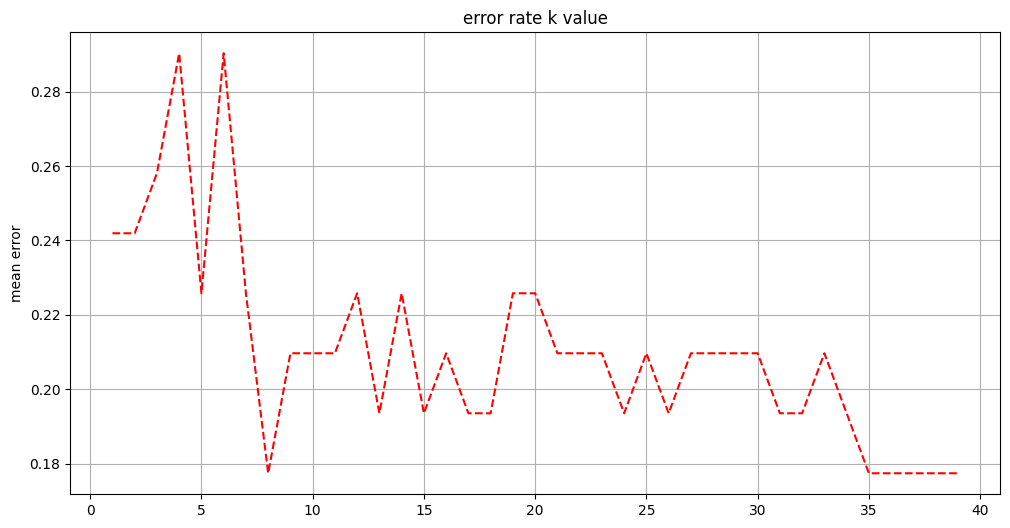

In [59]:
error =[]
for i in range(1,40):
  classifier = KNeighborsClassifier(n_neighbors=i)
  classifier.fit(x_train,y_train)
  pred_i = classifier.predict(x_test)
  error.append(np.mean(pred_i != y_test))

plt.figure(figsize=(12,6))
plt.plot(range(1,40),error, color='red',linestyle='dashed',markerfacecolor='blue',markersize=10)
plt.title('error rate k value')
plt.ylabel('mean error')
plt.grid()
plt.show()  

